In [1]:
# Import all necessary libraries

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read all data from both training and testing dataset

data_train = pd.read_csv('play_tennis_train.csv')
data_test = pd.read_csv('play_tennis_test.csv')

In [3]:
# Encoding data from text into number
le = preprocessing.LabelEncoder()
data_train_df = pd.DataFrame(data_train)
data_train_df_encoded = data_train_df.apply(le.fit_transform)

data_test_df = pd.DataFrame(data_test)
data_test_df_encoded = data_test_df.apply(le.fit_transform)

In [4]:
# Splitting dataset into test and train variables
x_train = data_train_df_encoded.drop(['play'],axis=1)
y_train = data_train_df_encoded['play']

x_test = data_test_df_encoded.drop(['play'],axis=1)
y_test = data_test_df_encoded['play']

In [8]:
# In this classification, we use GaussianNB model for prediction
model = GaussianNB()
nbtrain = model.fit(x_train, y_train)

y_pred = nbtrain.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75
Confusion Matrix


Confusion Matrix
[[1 0]
 [1 2]]


C:\Users\bveer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


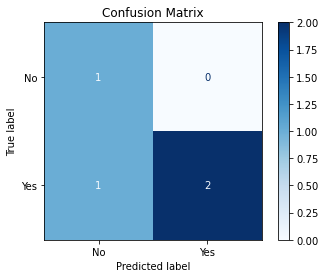

In [7]:
# Display confusion matrix results
disp = plot_confusion_matrix(nbtrain, x_test, y_test,
                             display_labels=['No','Yes'],
                             cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print('Confusion Matrix')
print(disp.confusion_matrix)